#Customer Churn Prediction
Customer attrition or churn, is when customers stop doing business with a company. It can have a significant impact on a company's revenue and it's crucial for businesses to find out the reasons why customers are leaving and take steps to reduce the number of customers leaving. One way to do this is by identifying customer segments that are at risk of leaving, and implementing retention strategies to keep them. Also, by using data and machine learning techniques, companies can predict which customers are likely to leave in the future and take actions to keep them before they decide to leave.

We are going to build a basic model for predicting customer churn using Telco Customer Churn dataset. We are using some classification algorithm to model customers who have left, using Python tools such as pandas for data manipulation and matplotlib for visualizations.

Let's get started.

#Steps Involved to Predict Customer Churn
#1. Importing Libraries
#2. Loading Dataset
#3. Exploratory Data Analysis
#4. Outliers using IQR method
#5. Cleaning and Transforming Data
#6. One-hot Encoding
#7. Rearranging Columns
#8. Feature Scaling
#9. Feature Selection
#10. Prediction using Logistic Regression
#11. Prediction using Support Vector Classifier
#12. Prediction using Decision Tree Classifier
#13. Prediction using KNN Classifier


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix , classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Preprocessing

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn (1).csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
data.shape

(7043, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# The column 'total charges' is object so let's convert it
data["TotalCharges"] = (pd.to_numeric(data["TotalCharges"],errors="coerce"))
# we used (errors=coerce) beacause some values have spaces

In [ ]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
data[np.isnan(data["TotalCharges"])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [ ]:
data.skew(numeric_only= True)

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

In [ ]:
data.corr(numeric_only= True)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


In [ ]:
# the Tenure column is 0 for these entries even though the MonthlyCharges column is not empty.
# since there are only 11 rows and deleting them will not affect the data

data.dropna(inplace=True)

We have 2 types of features in the dataset: categorical (two or more values and without any order) and numerical. Most of the feature names are self-explanatory, except for:

Partner: whether the customer has a partner or not (Yes, No),

Dependents: whether the customer has dependents or not (Yes, No),

OnlineBackup: whether the customer has online backup or not (Yes, No, No internet service),

tenure: number of months the customer has stayed with the company,

MonthlyCharges: the amount charged to the customer monthly,

TotalCharges: the total amount charged to the customer.
There are 7043 customers in the dataset and 19 features without customerID (non-informative) and Churn column (target variable). Most of the categorical features have 4 or less unique values.

In [ ]:
data.shape

(7032, 21)

In [ ]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

unique values of each columns which are obejct

In [ ]:
for i in data.columns[1:]:
    if data[i].dtype == "object":
        print(i,data[i].value_counts().index.values)

gender ['Male' 'Female']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes' 'No phone service']
InternetService ['Fiber optic' 'DSL' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['No' 'Yes' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'Two year' 'One year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


we see some of data like (No phone service,No internet service)

I decided to replace them with a simple NO

In [ ]:
data.replace('No internet service','No',inplace=True)
data.replace('No phone service','No',inplace=True)

In [ ]:
for i in data.columns[1:]:
    if data[i].dtype == "object":
        print(i,data[i].value_counts().index.values)

gender ['Male' 'Female']
Partner ['No' 'Yes']
Dependents ['No' 'Yes']
PhoneService ['Yes' 'No']
MultipleLines ['No' 'Yes']
InternetService ['Fiber optic' 'DSL' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['No' 'Yes']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'Two year' 'One year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [ ]:
#!pip install joblib==1.0.1
# install pycaret
#pip install --force-reinstall pycaret
#!pip install pycaret

In [ ]:
data.drop("customerID",axis="columns",inplace=True)
# init setup
#from pycaret.classification import*
#s = setup(data, target = 'Churn', ignore_features = ['customerID'])

In [ ]:
data.replace({'Yes': 1,'No': 0,'Female':1,'Male':0},inplace=True)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,1,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,1,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,0,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


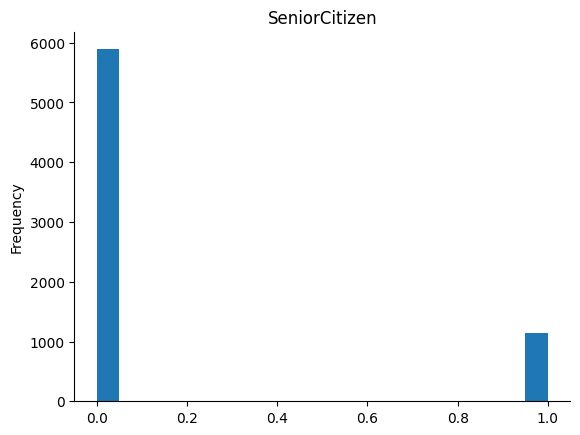

In [ ]:
# @title SeniorCitizen

from matplotlib import pyplot as plt
data['SeniorCitizen'].plot(kind='hist', bins=20, title='SeniorCitizen')
plt.gca().spines[['top', 'right',]].set_visible(False)

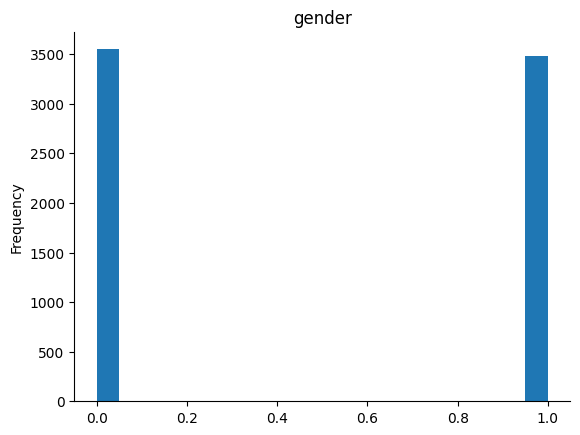

In [ ]:
# @title gender

from matplotlib import pyplot as plt
data['gender'].plot(kind='hist', bins=20, title='gender')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
data = pd.get_dummies(data=data, columns=['InternetService','Contract','PaymentMethod'])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,0,1,1,0,...,False,True,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,1,0,1,...,False,True,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,False,True,False,False,True,False,False,False,False,True
7039,1,0,1,1,72,1,1,0,1,1,...,False,False,True,False,True,False,False,True,False,False
7040,1,0,1,1,11,0,0,1,0,0,...,False,True,False,True,False,False,False,False,True,False
7041,0,1,1,0,4,1,1,0,0,0,...,False,False,True,True,False,False,False,False,False,True


In [ ]:
scale_col = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
data[scale_col] = scaler.fit_transform(data[scale_col])
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,False,True,False,True,False,False,False,False,True,False
1,0,0,0,0,0.464789,1,0,1,0,1,...,False,True,False,False,True,False,False,False,False,True
2,0,0,0,0,0.014085,1,0,1,1,0,...,False,True,False,True,False,False,False,False,False,True
3,0,0,0,0,0.619718,0,0,1,0,1,...,False,True,False,False,True,False,True,False,False,False
4,1,0,0,0,0.014085,1,0,0,0,0,...,False,False,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,False,True,False,False,True,False,False,False,False,True
7039,1,0,1,1,1.000000,1,1,0,1,1,...,False,False,True,False,True,False,False,True,False,False
7040,1,0,1,1,0.140845,0,0,1,0,0,...,False,True,False,True,False,False,False,False,True,False
7041,0,1,1,0,0.042254,1,1,0,0,0,...,False,False,True,True,False,False,False,False,False,True


# Model

Train_Test split

In [ ]:
X = data.drop("Churn",axis="columns")
y = data["Churn"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42,
                                                    test_size=0.2,stratify=y)

# Handeling Imbalance

In [ ]:
y_train.value_counts()

Churn
0    4130
1    1495
Name: count, dtype: int64

In [ ]:
smote = SMOTE(random_state=0)

X_train, y_train = smote.fit_resample(X_train,y_train)
X_test, y_test = smote.fit_resample(X_test,y_test)

In [ ]:
y_train.value_counts()

Churn
0    4130
1    4130
Name: count, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

Logistic Regression Model

In [ ]:
model = LogisticRegression()

# Perform cross-validation on training data
scores = cross_val_score(model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print the cross-validation scores
print("Cross-validation scores:", scores)

# Calculate and print the mean accuracy and standard deviation
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

# Train the model on the entire training set
model.fit(X_train, y_train)

# Evaluate the model on the testing set
test_score = model.score(X_test, y_test)
print("Test set accuracy:", test_score)

Cross-validation scores: [0.74878935 0.7748184  0.83716707 0.82506053 0.82869249]
Mean accuracy: 0.8029055690072638
Standard deviation of accuracy: 0.0347767534384461
Test set accuracy: 0.8044530493707648


In [99]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
plt.show()

Confusion Matrix:
[[835 198]
 [326 707]]


SVM Classifier

In [ ]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.79      0.76      0.78      1033
           1       0.77      0.80      0.78      1033

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



In [ ]:
confusion_matrix_svc = confusion_matrix(y_test, y_pred_svc)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

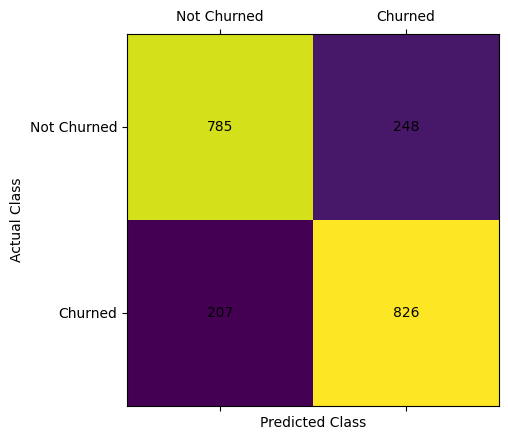

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_svc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_svc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
svc.score(X_train,y_train)

0.8336561743341404

In [ ]:
svc.score(X_train,y_train)

0.8336561743341404

Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

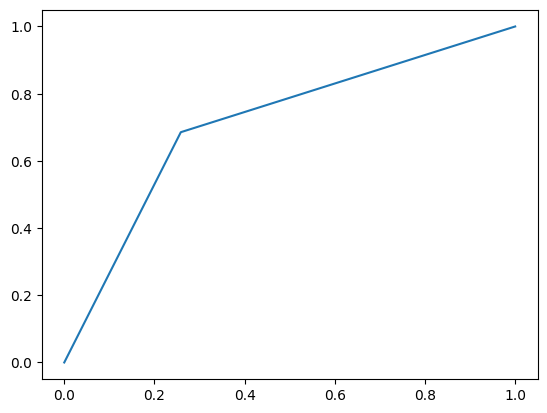

In [ ]:

from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
dt_accuracy = accuracy_score(y_test, y_pred_dtc)
dt_conf_matrix = confusion_matrix(y_test, y_pred_dtc)
dt_auc = roc_auc_score(y_test, y_pred_dtc)

# Plot ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dtc)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))

In [ ]:
print(classification_report(y_test, y_pred_dtc))

              precision    recall  f1-score   support

           0       0.70      0.74      0.72      1033
           1       0.73      0.69      0.71      1033

    accuracy                           0.71      2066
   macro avg       0.71      0.71      0.71      2066
weighted avg       0.71      0.71      0.71      2066



In [ ]:

confusion_matrix_dtc = confusion_matrix(y_test, y_pred_dtc)


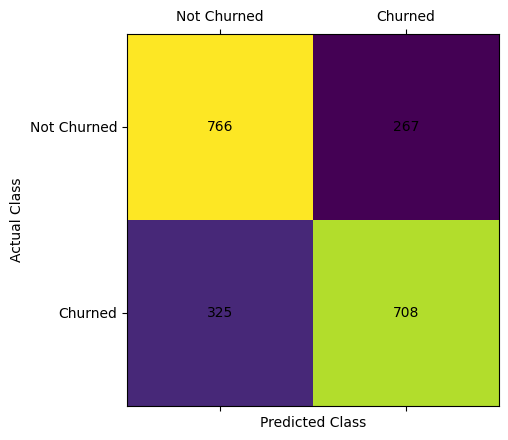

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_dtc)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_dtc[i, j], ha='center', va='center')


# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
dtc.score(X_train,y_train)

0.9991525423728813

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test, y_pred_dtc)

0.7134559535333979

**XGBoost Classifier**

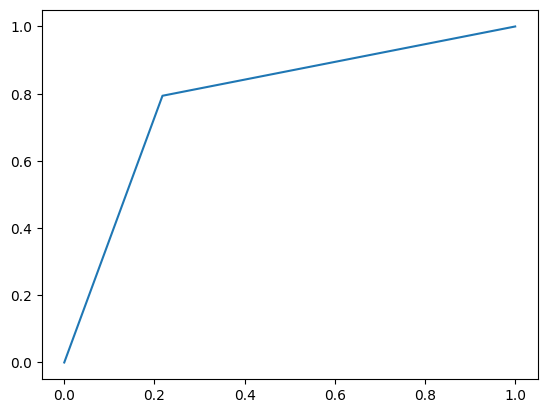

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()

# Train XGBoost model
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost model
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)
xgb_auc = roc_auc_score(y_test, xgb_predictions)

# Plot ROC curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_predictions)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(xgb_auc))

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=30)

In [ ]:
pred_knn = knn.predict(X_test)

In [ ]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

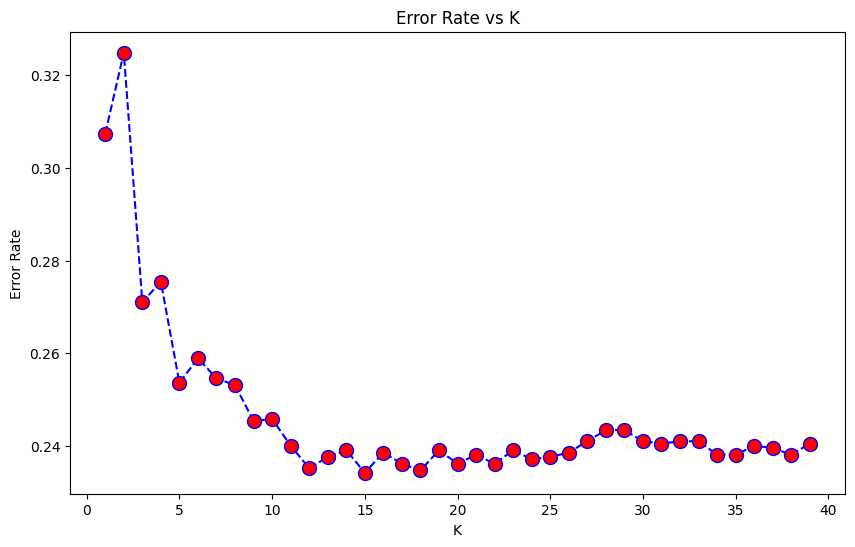

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.67      0.73      1033
           1       0.72      0.85      0.78      1033

    accuracy                           0.76      2066
   macro avg       0.77      0.76      0.76      2066
weighted avg       0.77      0.76      0.76      2066



In [ ]:
confusion_matrix_knn = confusion_matrix(y_test,pred_knn)

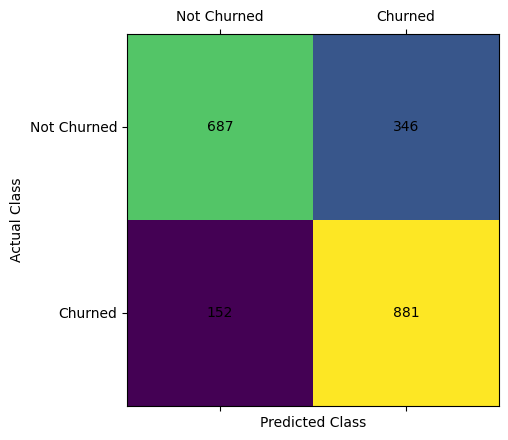

In [ ]:
# create a heatmap of the matrix using matshow()

plt.matshow(confusion_matrix_knn)

# add labels for the x and y axes
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

for i in range(2):
    for j in range(2):
        plt.text(j, i, confusion_matrix_knn[i, j], ha='center', va='center')

# Add custom labels for x and y ticks
plt.xticks([0, 1], ["Not Churned", "Churned"])
plt.yticks([0, 1], ["Not Churned", "Churned"])
plt.show()

In [ ]:
knn.score(X_train,y_train)

0.7889830508474577

In [ ]:
accuracy_score(y_test, pred_knn)

0.7589545014520813

**Performing Cross Validation on training data**

In [ ]:
dt_model = DecisionTreeClassifier()


In [ ]:

# Perform cross-validation on training data
dt_scores = cross_val_score(dt_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print Decision Tree cross-validation scores
print("Decision Tree Cross-validation scores:", dt_scores)
print("Decision Tree Mean accuracy:", dt_scores.mean())

Decision Tree Cross-validation scores: [0.74636804 0.73305085 0.81900726 0.78934625 0.79539952]
Decision Tree Mean accuracy: 0.776634382566586


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [ ]:

# XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Perform cross-validation on training data
xgb_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print XGBoost cross-validation scores
print("XGBoost Cross-validation scores:", xgb_scores)
print("XGBoost Mean accuracy:", xgb_scores.mean())


XGBoost Cross-validation scores: [0.76997579 0.77845036 0.8716707  0.8625908  0.86077482]
XGBoost Mean accuracy: 0.8286924939467312


In [ ]:
# Train and evaluate XGBoost on the testing set
xgb_model.fit(X_train, y_train)
xgb_test_score = xgb_model.score(X_test, y_test)
print("XGBoost Test set accuracy:", xgb_test_score)

XGBoost Test set accuracy: 0.7879961277831559


In [ ]:


# AdaBoost Classifier with Decision Tree as base estimator
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Perform cross-validation on training data
adaboost_scores = cross_val_score(adaboost_model, X_train, y_train, cv=5)  # 5-fold cross-validation

# Print AdaBoost cross-validation scores
print("AdaBoost Cross-validation scores:", adaboost_scores)
print("AdaBoost Mean accuracy:", adaboost_scores.mean())

# Train and evaluate AdaBoost on the testing set
adaboost_model.fit(X_train, y_train)
adaboost_test_score = adaboost_model.score(X_test, y_test)
print("AdaBoost Test set accuracy:", adaboost_test_score)

AdaBoost Cross-validation scores: [0.74939467 0.73002421 0.79782082 0.78510896 0.80145278]
AdaBoost Mean accuracy: 0.7727602905569009
AdaBoost Test set accuracy: 0.7274927395934172


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve

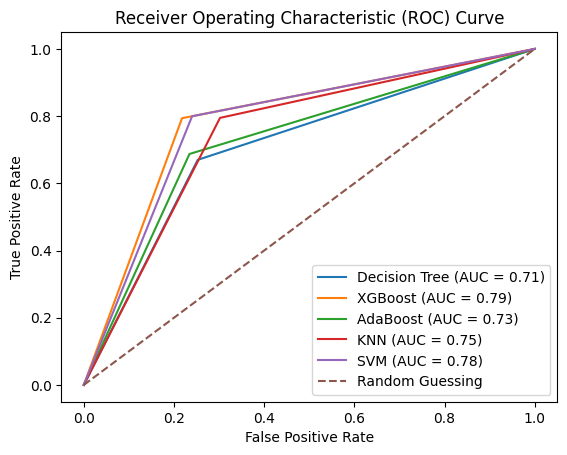

K-Nearest Neighbors Model:
Accuracy: 0.7463697967086157
Confusion Matrix:
 [[721 312]
 [212 821]]
AUC: 0.7463697967086157


Support Vector Machine Model:
Accuracy: 0.7797676669893514
Confusion Matrix:
 [[785 248]
 [207 826]]
AUC: 0.7797676669893513
Decision Tree Model:
Accuracy: 0.7086156824782188
Confusion Matrix:
 [[772 261]
 [341 692]]
AUC: 0.7086156824782188


XGBoost Model:
Accuracy: 0.7879961277831559
Confusion Matrix:
 [[808 225]
 [213 820]]
AUC: 0.7879961277831559


AdaBoost Model:
Accuracy: 0.7265246853823815
Confusion Matrix:
 [[791 242]
 [323 710]]
AUC: 0.7265246853823815


In [ ]:
# Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Train Decision Tree model
dt_model.fit(X_train, y_train)

# Evaluate Decision Tree model
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
dt_auc = roc_auc_score(y_test, dt_predictions)

# Plot ROC curve for Decision Tree
fpr_dt, tpr_dt, _ = roc_curve(y_test, dt_predictions)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (AUC = {:.2f})'.format(dt_auc))

# XGBoost Classifier
xgb_model = xgb.XGBClassifier()

# Train XGBoost model
xgb_model.fit(X_train, y_train)

# Evaluate XGBoost model
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predictions)
xgb_auc = roc_auc_score(y_test, xgb_predictions)

# Plot ROC curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_predictions)
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(xgb_auc))

# AdaBoost Classifier with Decision Tree as base estimator
adaboost_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

# Train AdaBoost model
adaboost_model.fit(X_train, y_train)

# Evaluate AdaBoost model
adaboost_predictions = adaboost_model.predict(X_test)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)
adaboost_conf_matrix = confusion_matrix(y_test, adaboost_predictions)
adaboost_auc = roc_auc_score(y_test, adaboost_predictions)

# Plot ROC curve for AdaBoost
fpr_adaboost, tpr_adaboost, _ = roc_curve(y_test, adaboost_predictions)
plt.plot(fpr_adaboost, tpr_adaboost, label='AdaBoost (AUC = {:.2f})'.format(adaboost_auc))


knn_model = KNeighborsClassifier()

# Train KNN model
knn_model.fit(X_train, y_train)

# Evaluate KNN model
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
knn_auc = roc_auc_score(y_test, knn_predictions)

# Plot ROC curve for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_predictions)
plt.plot(fpr_knn, tpr_knn, label='KNN (AUC = {:.2f})'.format(knn_auc))

# Support Vector Machine Classifier
svm_model = SVC(probability=True)  # probability=True enables probability estimates

# Train SVM model
svm_model.fit(X_train, y_train)

# Evaluate SVM model
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)
svm_auc = roc_auc_score(y_test, svm_predictions)

# Plot ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_predictions)
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:.2f})'.format(svm_auc))




# Plot ROC curve for random guessing (random classifier)
plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Print results
print("K-Nearest Neighbors Model:")
print("Accuracy:", knn_accuracy)
print("Confusion Matrix:\n", knn_conf_matrix)
print("AUC:", knn_auc)
print("\n")

print("Support Vector Machine Model:")
print("Accuracy:", svm_accuracy)
print("Confusion Matrix:\n", svm_conf_matrix)
print("AUC:", svm_auc)


# # Plot ROC curve for random guessing (random classifier)
# plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')

# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

# Print results
print("Decision Tree Model:")
print("Accuracy:", dt_accuracy)
print("Confusion Matrix:\n", dt_conf_matrix)
print("AUC:", dt_auc)
print("\n")

print("XGBoost Model:")
print("Accuracy:", xgb_accuracy)
print("Confusion Matrix:\n", xgb_conf_matrix)
print("AUC:", xgb_auc)
print("\n")

print("AdaBoost Model:")
print("Accuracy:", adaboost_accuracy)
print("Confusion Matrix:\n", adaboost_conf_matrix)
print("AUC:", adaboost_auc)

In [ ]:
pip install lazypredict

In [ ]:
from lazypredict.Supervised import LazyClassifier

In [ ]:
# Run LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models_summary, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Print models summary
print(models_summary)




 97%|█████████▋| 28/29 [01:49<00:05,  5.03s/it]

[LightGBM] [Info] Number of positive: 4130, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


100%|██████████| 29/29 [01:49<00:00,  3.79s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
AdaBoostClassifier                 0.80               0.80     0.80      0.79   
LGBMClassifier                     0.79               0.79     0.79      0.79   
CalibratedClassifierCV             0.79               0.79     0.79      0.79   
LinearSVC                          0.79               0.79     0.79      0.79   
LogisticRegression                 0.79               0.79     0.79      0.79   
LinearDiscriminantAnalysis         0.79               0.79     0.79      0.78   
RidgeClassifierCV                  0.79               0.79     0.79      0.78   
RidgeClassifier                    0.79               0.79     0.79      0.78   
XGBClassifier                      0.78               0.78     0.78      0.78   
NuSVC                              0.78               0.78     0.78      0.78   
QuadraticDiscriminantAnalysi

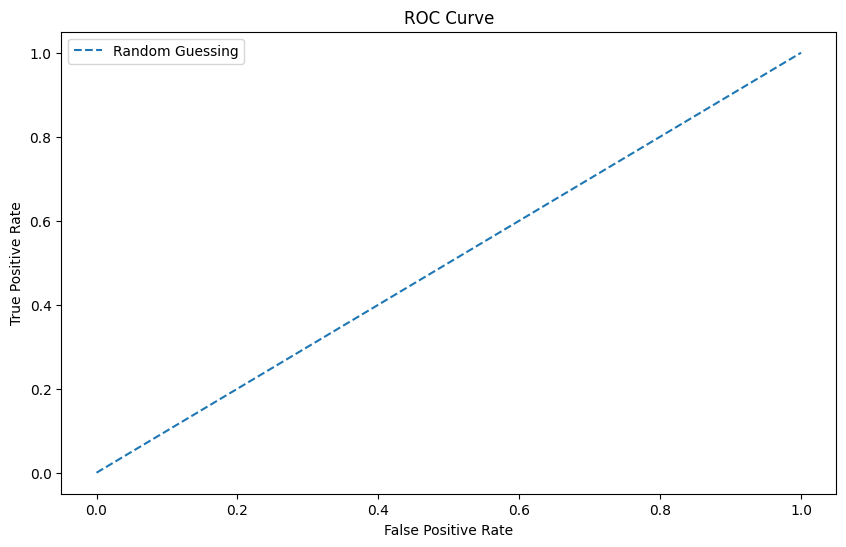

In [ ]:
# Plot ROC curves for each model
plt.figure(figsize=(10, 6))
for model in predictions.keys():
    try:
        model_predictions = predictions[model]
        if len(model_predictions.shape) > 1 and model_predictions.shape[1] > 1:
            # Probability of positive class (1)
            fpr, tpr, _ = roc_curve(y_test, model_predictions[:, 1])
            auc = roc_auc_score(y_test, model_predictions[:, 1])
            plt.plot(fpr, tpr, label='%s (AUC = %.2f)' % (model, auc))
    except KeyError:
        print(f"Unable to plot ROC curve for model: {model}")

plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [ ]:
from lazypredict.Supervised import LazyRegressor

In [ ]:
# Fit all regression models
reg = LazyRegressor(predictions=True)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)
models

 98%|█████████▊| 41/42 [02:51<00:02,  2.20s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002097 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 804
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 16
[LightGBM] [Info] Start training from score 0.500000


100%|██████████| 42/42 [02:52<00:00,  4.10s/it]


,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
LGBMRegressor,0.43,0.44,0.38,0.43
GradientBoostingRegressor,0.41,0.42,0.38,3.84
HistGradientBoostingRegressor,0.40,0.40,0.39,12.93
Lars,0.38,0.39,0.39,0.07
LassoLarsIC,0.38,0.39,0.39,0.11
TransformedTargetRegressor,0.38,0.39,0.39,0.12
LinearRegression,0.38,0.39,0.39,0.13
Ridge,0.38,0.39,0.39,0.06
RidgeCV,0.38,0.39,0.39,0.12


**Applying Neural Network**

In [ ]:
model=Sequential(

    [Dense(26, input_shape=(26,), activation='relu'),

     Dense(18, activation='relu'),

     Dense(1,activation="sigmoid")])


model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                702       
                                                                 
 dense_1 (Dense)             (None, 18)                486       
                                                                 
 dense_2 (Dense)             (None, 1)                 19        
                                                                 
Total params: 1207 (4.71 KB)
Trainable params: 1207 (4.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
X_train=tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train=tf.convert_to_tensor(y_train, dtype=tf.float32)
X_test=tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test=tf.convert_to_tensor(y_test, dtype=tf.float32)

In [ ]:
history=model.fit(X_train, y_train, epochs=200, validation_split=0.2)

Epoch 1/200
207/207 [==============================] - 5s 6ms/step - loss: 0.5313 - accuracy: 0.7290 - val_loss: 0.6429 - val_accuracy: 0.7040
Epoch 2/200
207/207 [==============================] - 1s 3ms/step - loss: 0.4652 - accuracy: 0.7774 - val_loss: 0.5562 - val_accuracy: 0.7724
Epoch 3/200
207/207 [==============================] - 1s 3ms/step - loss: 0.4576 - accuracy: 0.7831 - val_loss: 0.5492 - val_accuracy: 0.7791
Epoch 4/200
207/207 [==============================] - 1s 4ms/step - loss: 0.4527 - accuracy: 0.7853 - val_loss: 0.5718 - val_accuracy: 0.7639
Epoch 5/200
207/207 [==============================] - 1s 4ms/step - loss: 0.4485 - accuracy: 0.7865 - val_loss: 0.5309 - val_accuracy: 0.8033
Epoch 6/200
207/207 [==============================] - 1s 6ms/step - loss: 0.4456 - accuracy: 0.7890 - val_loss: 0.5408 - val_accuracy: 0.7833
Epoch 7/200
207/207 [==============================] - 1s 5ms/step - loss: 0.4416 - accuracy: 0.7943 - val_loss: 0.5538 - val_accuracy: 0.7597

In [ ]:
model.evaluate(X_test, y_test)

65/65 [==============================] - 0s 2ms/step - loss: 0.5904 - accuracy: 0.7464


[0.5904020071029663, 0.7463697791099548]

In [ ]:
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

65/65 [==============================] - 0s 3ms/step


In [ ]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n         0.0       0.72      0.81      0.76      1033\n         1.0       0.78      0.68      0.73      1033\n\n    accuracy                           0.75      2066\n   macro avg       0.75      0.75      0.75      2066\nweighted avg       0.75      0.75      0.75      2066\n'

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

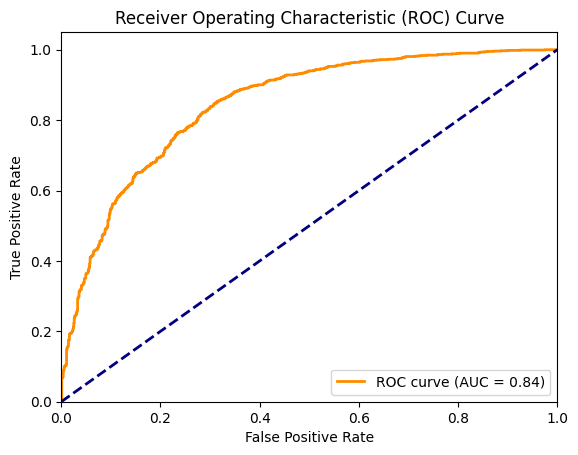

In [ ]:

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, yp)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Text(95.72222222222221, 0.5, 'Truth')

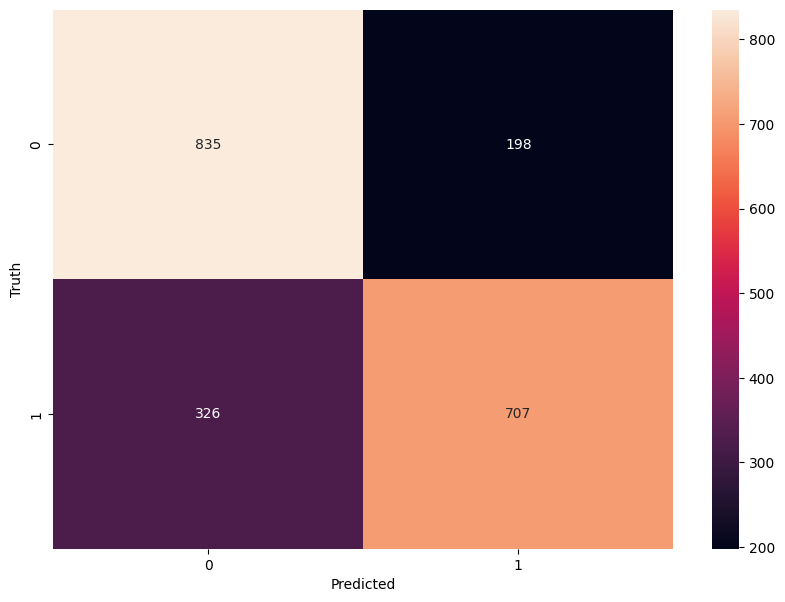

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.metrics import confusion_matrix
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# **Conclusion**
So, Thank you for sticking with me until the end. If you are interested in learning more about this dataset, you can explore other machine learning classification models such as Gradient Boosting Classifier, Stochastic Gradient Boosting (SGB) Classifierand Cat Boost Classifier etc . Additionally, you can try tuning the model's hyperparameters using techniques like GridSearchCV. I am not going into detail about those topics, but if you are interested, feel free to explore them further.

